In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Задание 1

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


**Построить точечный график**

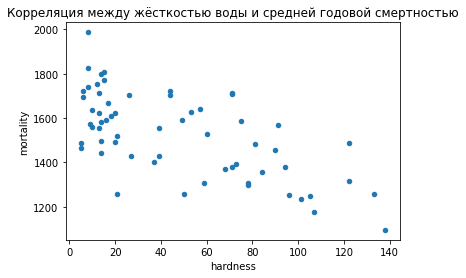

In [ ]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью')

**Рассчитать коэффициенты корреляции Пирсона и Спирмена**

Посмотрим нет, ли выбросов

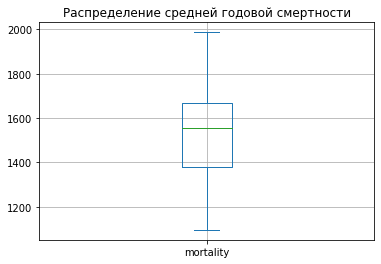

In [ ]:
df['mortality'].plot(kind='box',
                   title='Распределение средней годовой смертности', grid=True)


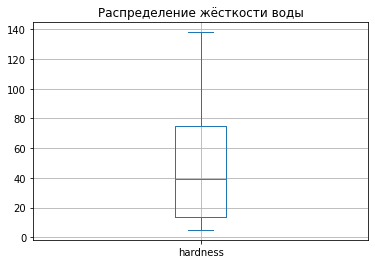

In [ ]:
df['hardness'].plot(kind='box',
                   title='Распределение жёсткости воды', grid=True)

In [ ]:
df['mortality'].corr(df['hardness'])   # Пирсон. Средняя обратная связь 

-0.6548486232042463

In [ ]:
df['mortality'].corr(df['hardness'], method='spearman')   # Спирмен. Средняя обратная связь 

-0.6316646189166502

**Построить модель линейной регрессии**

In [ ]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[-3.28281845]
1683.9212680875548


*Y = -3.28 * x + 1683.92*

**Рассчитать коэффициент детерминации**

In [ ]:
model.score(X_test, y_test)   # Коэффициент детерминации. Модель не надёжна

0.5099679408034544

**Вывести график остатков**

In [ ]:
y_pred = model.predict(X)

Text(0, 0.5, 'Средняя годовая смертность')

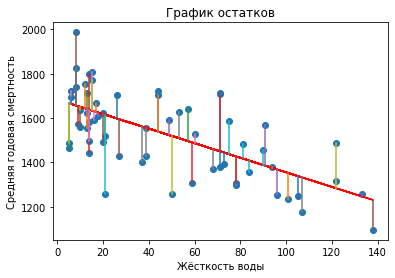

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.plot([X['hardness'], X['hardness']], [y, y_pred])
plt.title('График остатков')
plt.xlabel('Жёсткость воды')
plt.ylabel('Средняя годовая смертность')

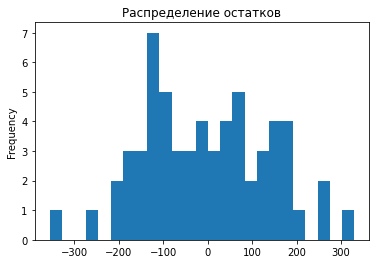

In [ ]:
rr = y - y_pred
rr.plot(kind='hist', title='Распределение остатков', bins=25)

▶ Корреляционый анлиз показал, что между жёсткостью воды и средней годовой смертностью есть средняя обратная взаимосвязь, это значит, что эти два показателя взаимоизменяются: при увеличении жёсткости воды, средняя годовая смертность пропорционально уменьшается. Но на основе предоставленных данных, нельзя говорить о причинах увеличения смертности или изменения жёсткости воды.


▶ В ходе регрессионного анализа построена модель, которая позволяет прогнозировать среднюю годовую смертность на основе жёсткости воды. Модель не надёжна, т.к. коэффициент детерминации равено 0,5. По графику остатков сложно оцекнить качество модели, но график распредлелния остатков, где распределение не нормальное, поддтверждает низкое качество модели.

# Задание 2

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?


In [ ]:
df_south = df.loc[df['location'] == 'South']   # 26 строк
df_north = df.loc[df['location'] == 'North']   # 35 строк

**Южные города**

In [ ]:
print(df_south['mortality'].corr(df_south['hardness']))   # Пирсон. Средняя обратная связь 
print(df_south['mortality'].corr(df_south['hardness'], method='spearman'))   # Спирмен. Средняя обратная связь 

-0.6021532715484156
-0.5957229185013566


In [ ]:
X = df_south[['hardness']]
y = df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # т.к. данных очень мало, увеличим часть данных, на ктр модель будет обучаться 
model = LinearRegression()    
model.fit(X_train, y_train)  # y = -2.16 * X + 1529.14
print(model.coef_)
print(model.intercept_)

[-2.1645425]
1529.143749365289


In [ ]:
model.score(X_test, y_test)   # Коэффициент детерминации. Качество модели чуть выше среднего (но даных было мало, что могло повлиять на качество)

0.7724212353112103

Text(0, 0.5, 'Средняя годовая смертность')

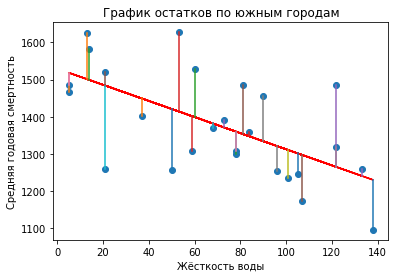

In [ ]:
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.plot([X['hardness'], X['hardness']], [y, y_pred])
plt.title('График остатков по южным городам')
plt.xlabel('Жёсткость воды')
plt.ylabel('Средняя годовая смертность')

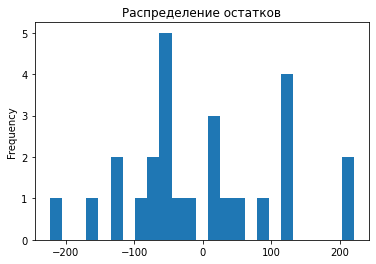

In [ ]:
rr = y - y_pred
rr.plot(kind='hist', title='Распределение остатков', bins=25)

**Северные города**

In [ ]:
print(df_north['mortality'].corr(df_north['hardness']))   # Пирсон. Слабая обратная связь 
print(df_north['mortality'].corr(df_north['hardness'], method='spearman'))   # Спирмен. Слабая обратная связь 

-0.3685978383288718
-0.4042078956511175


In [ ]:
X = df_north[['hardness']]
y = df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # т.к. данных очень мало, увеличим часть данных, на ктр модель будет обучаться 
model = LinearRegression()    
model.fit(X_train, y_train)  # y = -1,8 * X + 1687.7
print(model.coef_)
print(model.intercept_)

[-1.822715]
1687.7073646127963


In [ ]:
model.score(X_test, y_test)   # Коэффициент детерминации. Качество модели очень плохое, что ожидалось, т.к. и взаимосвязь между показателями слабая 

0.032340393386281474

Text(0, 0.5, 'Средняя годовая смертность')

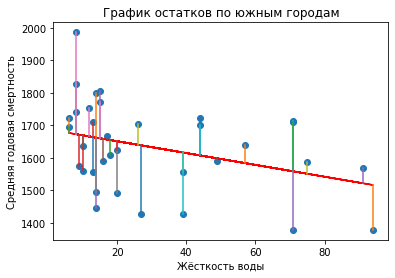

In [ ]:
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.plot([X['hardness'], X['hardness']], [y, y_pred])
plt.title('График остатков по южным городам')
plt.xlabel('Жёсткость воды')
plt.ylabel('Средняя годовая смертность')

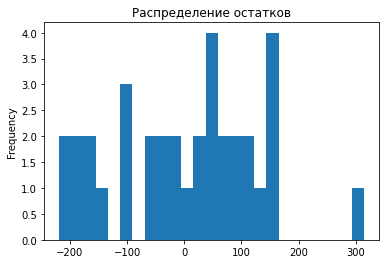

In [ ]:
rr = y - y_pred
rr.plot(kind='hist', title='Распределение остатков', bins=25)

▶ Для южных городов, взаимосвязь сохраняется, результаты анализа соответсвуют результатм ао обобщённым данным.  Для северных городов такая взаимосвязь не сохраняется. 